this code normalize the dataset before adding err,the err are come from normalized data 

In [99]:
import jupyter_Importer
from MLModels_FeatureImportance import featureImportance_linearRegression
from MLModels_FeatureImportance import featureImportance_permutation
from MLModels_FeatureImportance import featureImportance_DTree

import pandas as pd
import numpy as np
import math
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [100]:
dataset = pd.read_csv("Occupancy.csv", names = ['x' + str(i) for i in range(1, 7)] + ['y'], sep = ",")
dataset.head()

,x1,x2,x3,x4,x5,x6,y
0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-02 14:19:00,23.7,26.272,585.2,749.2,0.0047641630241641,1
2,2015-02-02 14:19:59,23.718,26.29,578.4,760.4,0.0047726609921251,1
3,2015-02-02 14:21:00,23.73,26.23,572.666666666667,769.666666666667,0.0047651525524654,1
4,2015-02-02 14:22:00,23.7225,26.125,493.75,774.75,0.0047437733559968,1


In [101]:
dataset_light_co2 = dataset.iloc[1:,3:5]
dataset_light_co2['y'] = dataset.iloc[1:,6:7]
dataset_light_co2.columns = ['x1','x2','y']
dataset_light_co2['x1'] = dataset_light_co2['x1'].apply(lambda x : float(x))
dataset_light_co2['x2'] = dataset_light_co2['x2'].apply(lambda x : float(x))
dataset_light_co2['y'] = dataset_light_co2['y'].apply(lambda x : int(x))
dataset_light_co2

,x1,x2,y
1,585.200000,749.200000,1
2,578.400000,760.400000,1
3,572.666667,769.666667,1
4,493.750000,774.750000,1
5,488.600000,779.000000,1
...,...,...,...
20556,429.750000,1505.250000,1
20557,423.500000,1514.500000,1
20558,423.500000,1521.500000,1
20559,418.750000,1632.000000,1


In [102]:
#preprocess the data
#dataset_light_co2_nml = dataset_light_co2.iloc[:,:-1]
#minmax = preprocessing.MinMaxScaler()
#dataset_light_co2_nml = minmax.fit_transform(dataset_light_co2_nml)
#dataset_light_co2_nml = preprocessing.scale(dataset_light_co2_nml)
#print(dataset_light_co2_nml.shape,dataset_light_co2.info())


In [103]:
subset = dataset_light_co2.sample(frac=0.2,replace=False,random_state=43)
dataset_light_co2 = dataset_light_co2.append(subset)
dataset_light_co2 = dataset_light_co2.drop_duplicates(subset=['x1','x2','y'],keep=False)

subsample_x = subset.iloc[:,:-1].values
subsample_y = subset.iloc[:,-1].values

#from 0-24 means angle
error_a = []
error_b = []
for i in range(0,25) :
    error_a.append(i)
    error_b.append(24-i)

print(error_a,error_b)
print(dataset_light_co2.info(),subset.info())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24] [24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6757 entries, 1 to 20560
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6757 non-null   float64
 1   x2      6757 non-null   float64
 2   y       6757 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 211.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4112 entries, 8855 to 4674
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4112 non-null   float64
 1   x2      4112 non-null   float64
 2   y       4112 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 128.5 KB
None None


In [104]:
subsample_x = pd.DataFrame(subsample_x)
minmax = preprocessing.MinMaxScaler()
data_minmax = minmax.fit_transform(subsample_x)

In [105]:
importanceReg,RegCoef = featureImportance_linearRegression(data_minmax,subsample_y)
model = KNeighborsClassifier(n_neighbors=5,algorithm="brute")  
model.fit(data_minmax,subsample_y)  
importancePermu,PermuCoef = featureImportance_permutation(model,data_minmax,subsample_y)
importanceDTree,DTreeCoef = featureImportance_DTree(data_minmax,subsample_y)
print("RegCoef : " +str(RegCoef))
print("importanceReg : "+str(importanceReg))
print("PermuCoef : "+str(PermuCoef))
print("importancePermu : "+str(importancePermu))
print("DTreeCoef : " +str(DTreeCoef))
print("importanceDTree : "+str(importanceDTree))

RegCoef : [2.9109803136259096, 0.25542123118304033]
importanceReg : [0.9193339102547552, 0.08066608974524474]
PermuCoef : [0.29975680933852145, 0.06118677042801557]
importancePermu : [0.8304810672416116, 0.16951893275838834]
DTreeCoef : [0.9584749355112676, 0.04152506448873233]
importanceDTree : [0.9584749355112676, 0.04152506448873233]


In [106]:
#preprocess the data
dataset_light_co2_nml = dataset_light_co2.iloc[:,:-1]
minmax = preprocessing.MinMaxScaler()
dataset_light_co2_nml = minmax.fit_transform(dataset_light_co2_nml)
dataset_light_co2_nml = preprocessing.scale(dataset_light_co2_nml)
print(dataset_light_co2_nml.shape,dataset_light_co2.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6757 entries, 1 to 20560
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6757 non-null   float64
 1   x2      6757 non-null   float64
 2   y       6757 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 211.2 KB
(6757, 2) None


In [107]:
dataset_light_co2_nml = pd.DataFrame(dataset_light_co2_nml)
dataset_light_co2_nml.columns = ['x1','x2']
#dataset_light_co2_nml['y'] = dataset_light_co2['y']
dataset_light_co2_nml.insert(2,'y',dataset_light_co2['y'].values)

x1_min = -1.333440
x1_max = 5.659035
x2_min = -1.260885
x2_max = 3.575273
print(dataset_light_co2_nml.max(),dataset_light_co2_nml.min())
print(dataset_light_co2_nml.info(),dataset_light_co2.info())

x1    5.659035
x2    3.575273
y     1.000000
dtype: float64 x1   -1.333440
x2   -1.260885
y     0.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6757 entries, 0 to 6756
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6757 non-null   float64
 1   x2      6757 non-null   float64
 2   y       6757 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 158.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6757 entries, 1 to 20560
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6757 non-null   float64
 1   x2      6757 non-null   float64
 2   y       6757 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 211.2 KB
None None


In [108]:
#adding err by the normalized data
#bound the value between min and max

def df_2feature_be_generates(BE,i,n,importance=importanceReg,df=dataset_light_co2_nml.copy()) :
    #i = 1 for brute force iteration,n = 1for negative importance
    temp = dataset_light_co2_nml.copy()
    angle = 0 #0 for normal case ,1 for adding error with cos sin
    #switch = {1:func1,2:func2}
    #temp = df.copy()
    df_2feature_be = pd.DataFrame.to_numpy(dataset_light_co2_nml)
    #df_2feature_be = pd.DataFrame.to_numpy(df)
    
    if i >= 0 and n == 0 :
        angle = 1
        e1 = temp['x1'].mean()*BE*math.cos((error_a[i]/(error_a[i]+error_b[i])))
        e2 = temp['x2'].mean()*BE*math.sin((error_b[i]/(error_a[i]+error_b[i])))
    elif i == -1 and n == 1:
        angle = 1
        e1 = temp['x1'].mean()*BE*math.cos(importance[0])
        e2 = temp['x2'].mean()*BE*math.sin(importance[1])
    elif i == -1 and n == 0 :
        angle = 1
        e1 = temp['x1'].mean()*BE*math.cos(importance[1])
        e2 = temp['x2'].mean()*BE*math.sin(importance[0])
    

    if angle == 0:
        for idx,cell in temp['x1'].iteritems():
            temp['x1'][idx] += e1
            if temp['x1'][idx] > x1_max:
                temp['x1'][idx] = x1_max
        temp = temp.to_numpy()
        df_2feature_be = np.vstack((df_2feature_be,temp))
        #print(df_2feature_be.shape)
        temp = dataset_light_co2_nml.copy()

        for idx,cell in temp['x1'].iteritems():
            temp['x1'][idx] = temp['x1'][idx] - e1
            if temp['x1'][idx] < x1_min:
                temp['x1'][idx] = x1_min
        temp = temp.to_numpy()
        df_2feature_be = np.vstack((df_2feature_be,temp))
        #print(df_2feature_be.shape)
        temp = dataset_light_co2_nml.copy()

        for idx,cell in temp['x2'].iteritems():
            temp['x2'][idx] += e2
            if temp['x2'][idx] > x2_max:
                temp['x2'][idx] = x2_max
        temp = temp.to_numpy()
        df_2feature_be = np.vstack((df_2feature_be,temp))
        #print(df_2feature_be.shape)
        temp = dataset_light_co2_nml.copy()

        for idx,cell in temp['x2'].iteritems():
            temp['x2'][idx] = temp['x2'][idx] - e2
            if temp['x2'][idx] < x2_min:
                temp['x2'][idx] = x2_min
        temp = temp.to_numpy()
        df_2feature_be = np.vstack((df_2feature_be,temp))
        #print(df_2feature_be.shape)
        temp = dataset_light_co2_nml.copy()

        df_2feature_be = pd.DataFrame(df_2feature_be)
        #print(df_2feature_be)

    elif angle == 1:
        for idx,cell in temp['x1'].iteritems():
            temp['x1'][idx] += e1
            if temp['x1'][idx] > x1_max:
                temp['x1'][idx] = x1_max
            if temp['x1'][idx] < x1_min:
                temp['x1'][idx] = x1_min
        temp = temp.to_numpy()
        df_2feature_be = np.vstack((df_2feature_be,temp))
        #print(df_2feature_be.shape)
        temp = dataset_light_co2_nml.copy()

        for idx,cell in temp['x2'].iteritems():
            temp['x2'][idx] += e2
            if temp['x2'][idx] > x2_max:
                temp['x2'][idx] = x2_max
            if temp['x2'][idx] < x2_min:
                temp['x2'][idx] = x2_min
        temp = temp.to_numpy()
        df_2feature_be = np.vstack((df_2feature_be,temp))
        #print(df_2feature_be.shape)
        temp = dataset_light_co2_nml.copy()
        
        df_2feature_be = pd.DataFrame(df_2feature_be)

    

    return df_2feature_be

In [109]:
#using importanceReg as error allocation rate to predict by svm
BE = 0.2
df_2feature_be = df_2feature_be_generates(BE,-1,0,importanceReg)
x_be = df_2feature_be.iloc[:,:-1].values
y_be = df_2feature_be.iloc[:,-1].values
print(x_be.shape,y_be.shape)
X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
subset_raw = clf_BE.score(subsample_x, subsample_y)
print('BESVM Accuracy (on training) = with x1 bounded error ('+str(BE)+'%*'+str(importanceReg[1])+'),x2 with error ('+str(BE)+'%*'+str(importanceReg[0])+') : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error ('+str(BE)+'%*'+str(importanceReg[1])+'),x2 with error ('+str(BE)+'%*'+str(importanceReg[0])+') : '+str(result_BE_test))
print('BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error '+str(subset_raw))


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

(20271, 2) (20271,)
BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.08066608974524474),x2 with error (0.2%*0.9193339102547552) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.08066608974524474),x2 with error (0.2%*0.9193339102547552) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


In [110]:
import matplotlib.pyplot as plt

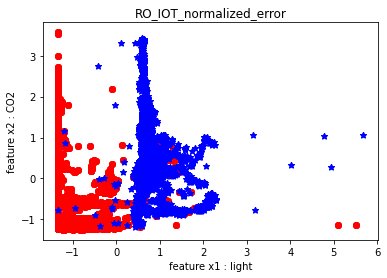

In [111]:
plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('RO_IOT_normalized_error')
plt.xlabel('feature x1 : light')
plt.ylabel('feature x2 : CO2')
plt.show()

In [112]:
#using importancePermu as error allocation rate to predict by svm
df_2feature_be = df_2feature_be_generates(BE,-1,0,importancePermu)
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values
X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
subset_raw = clf_BE.score(subsample_x, subsample_y)
print('BESVM Accuracy (on training) = with x1 bounded error ('+str(BE)+'%*'+str(importancePermu[1])+'),x2 with error ('+str(BE)+'%*'+str(importancePermu[0])+') : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error ('+str(BE)+'%*'+str(importancePermu[1])+'),x2 with error ('+str(BE)+'%*'+str(importancePermu[0])+') : '+str(result_BE_test))
print('BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error '+str(subset_raw))



d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.16951893275838834),x2 with error (0.2%*0.8304810672416116) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.16951893275838834),x2 with error (0.2%*0.8304810672416116) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


try knn/kmeans with normalized data

In [113]:
#using importanceReg as error allocation rate to predict by knn
df_2feature_be = df_2feature_be_generates(BE,-1,0,importanceReg)
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values
X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
KNN_BE = KNeighborsClassifier()
KNN_BE.fit(X_train, y_train)
y_BE_predict = KNN_BE.predict(X_test)
result_BE_train = KNN_BE.score(X_train, y_train)
result_BE_test = KNN_BE.score(X_test, y_test)
subset_raw = KNN_BE.score(subsample_x, subsample_y)
print('BEKNN Accuracy (on training) = with x1 bounded error ('+str(BE)+'%*'+str(importanceReg[1])+'),x2 with error ('+str(BE)+'%*'+str(importanceReg[0])+') : '+str(result_BE_train))
print('BEKNN Accuracy (on testing) = with x1 bounded error ('+str(BE)+'%*'+str(importanceReg[1])+'),x2 with error ('+str(BE)+'%*'+str(importanceReg[0])+') : '+str(result_BE_test))
print('BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error '+str(subset_raw))


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.08066608974524474),x2 with error (0.2%*0.9193339102547552) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.08066608974524474),x2 with error (0.2%*0.9193339102547552) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


In [114]:
#using importancePermu as error allocation rate to predict by knn
df_2feature_be = df_2feature_be_generates(BE,-1,0,importancePermu)
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values
X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
KNN_BE = KNeighborsClassifier()
KNN_BE.fit(X_train, y_train)
y_BE_predict = KNN_BE.predict(X_test)
result_BE_train = KNN_BE.score(X_train, y_train)
result_BE_test = KNN_BE.score(X_test, y_test)
subset_raw = KNN_BE.score(subsample_x, subsample_y)
print('BEKNN Accuracy (on training) = with x1 bounded error ('+str(BE)+'%*'+str(importancePermu[1])+'),x2 with error ('+str(BE)+'%*'+str(importancePermu[0])+') : '+str(result_BE_train))
print('BEKNN Accuracy (on testing) = with x1 bounded error ('+str(BE)+'%*'+str(importancePermu[1])+'),x2 with error ('+str(BE)+'%*'+str(importancePermu[0])+') : '+str(result_BE_test))
print('BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error '+str(subset_raw))


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.16951893275838834),x2 with error (0.2%*0.8304810672416116) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.16951893275838834),x2 with error (0.2%*0.8304810672416116) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


In [115]:
light_CScore = 1.0117280381068128
CO2_CSore = 0.9885700987654558
ConfidenceSore_lightCO2 = [light_CScore/(light_CScore+CO2_CSore),CO2_CSore/(light_CScore+CO2_CSore)]

#using confidence as error allocation rate to predict by svm
df_2feature_be = df_2feature_be_generates(BE,-1,0,ConfidenceSore_lightCO2)
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values
X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
subset_raw = clf_BE.score(subsample_x, subsample_y)
print('BESVM Accuracy (on training) using confidence score on x1 bounded error ('+str(BE)+'%*'+str(ConfidenceSore_lightCO2[1])+'),x2 with error ('+str(BE)+'%*'+str(ConfidenceSore_lightCO2[0])+') : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = using confidence score on  x1 bounded error ('+str(BE)+'%*'+str(ConfidenceSore_lightCO2[1])+'),x2 with error ('+str(BE)+'%*'+str(ConfidenceSore_lightCO2[0])+') : '+str(result_BE_test))
print('BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error '+str(subset_raw))




d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) using confidence score on x1 bounded error (0.2%*0.4942113780654799),x2 with error (0.2%*0.5057886219345201) : 0.9747779970399605
BESVM Accuracy (on testing) = using confidence score on  x1 bounded error (0.2%*0.4942113780654799),x2 with error (0.2%*0.5057886219345201) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


In [116]:
#using confidence as error allocation rate to predict by knn
df_2feature_be = df_2feature_be_generates(BE,-1,0,ConfidenceSore_lightCO2)
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values
X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
KNN_BE = KNeighborsClassifier()
KNN_BE.fit(X_train, y_train)
y_BE_predict = KNN_BE.predict(X_test)
result_BE_train = KNN_BE.score(X_train, y_train)
result_BE_test = KNN_BE.score(X_test, y_test)
subset_raw = KNN_BE.score(subsample_x, subsample_y)
print('BEKN Accuracy (on training) using confidence score on x1 bounded error ('+str(BE)+'%*'+str(ConfidenceSore_lightCO2[1])+'),x2 with error ('+str(BE)+'%*'+str(ConfidenceSore_lightCO2[0])+') : '+str(result_BE_train))
print('BEKNN Accuracy (on testing) = using confidence score on  x1 bounded error ('+str(BE)+'%*'+str(ConfidenceSore_lightCO2[1])+'),x2 with error ('+str(BE)+'%*'+str(ConfidenceSore_lightCO2[0])+') : '+str(result_BE_test))
print('BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error '+str(subset_raw))


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKN Accuracy (on training) using confidence score on x1 bounded error (0.2%*0.4942113780654799),x2 with error (0.2%*0.5057886219345201) : 0.9906265416872225
BEKNN Accuracy (on testing) = using confidence score on  x1 bounded error (0.2%*0.4942113780654799),x2 with error (0.2%*0.5057886219345201) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


In [117]:
#brute force allocation
#brute force from 0-20 using svm
BE = 0.2
for i in range(21) :
    df_2feature_be = df_2feature_be_generates(BE,i,0)
    x_be = df_2feature_be.iloc[:, :-1].values
    y_be = df_2feature_be.iloc[:,-1].values
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)
    subset_raw = clf_BE.score(subsample_x, subsample_y)
    print('BESVM Accuracy (on training) = with x1 bounded error ('+str(BE)+'%*'+str((error_a[i]/(error_a[i]+error_b[i])))+'),x2 with error ('+str(BE)+'%*'+str((error_b[i]/(error_a[i]+error_b[i])))+') : '+str(result_BE_train))
    print('BESVM Accuracy (on testing) = with x1 bounded error ('+str(BE)+'%*'+str((error_a[i]/(error_a[i]+error_b[i])))+'),x2 with error ('+str(BE)+'%*'+str((error_b[i]/(error_a[i]+error_b[i])))+') : '+str(result_BE_test))
    print('BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error '+str(subset_raw))
    

d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.0),x2 with error (0.2%*1.0) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.0),x2 with error (0.2%*1.0) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.041666666666666664),x2 with error (0.2%*0.9583333333333334) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.041666666666666664),x2 with error (0.2%*0.9583333333333334) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.08333333333333333),x2 with error (0.2%*0.9166666666666666) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.08333333333333333),x2 with error (0.2%*0.9166666666666666) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.125),x2 with error (0.2%*0.875) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.125),x2 with error (0.2%*0.875) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.16666666666666666),x2 with error (0.2%*0.8333333333333334) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.16666666666666666),x2 with error (0.2%*0.8333333333333334) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.20833333333333334),x2 with error (0.2%*0.7916666666666666) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.20833333333333334),x2 with error (0.2%*0.7916666666666666) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.25),x2 with error (0.2%*0.75) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.25),x2 with error (0.2%*0.75) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.2916666666666667),x2 with error (0.2%*0.7083333333333334) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.2916666666666667),x2 with error (0.2%*0.7083333333333334) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.3333333333333333),x2 with error (0.2%*0.6666666666666666) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.3333333333333333),x2 with error (0.2%*0.6666666666666666) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.375),x2 with error (0.2%*0.625) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.375),x2 with error (0.2%*0.625) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.4166666666666667),x2 with error (0.2%*0.5833333333333334) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.4166666666666667),x2 with error (0.2%*0.5833333333333334) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.4583333333333333),x2 with error (0.2%*0.5416666666666666) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.4583333333333333),x2 with error (0.2%*0.5416666666666666) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.5),x2 with error (0.2%*0.5) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.5),x2 with error (0.2%*0.5) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.5416666666666666),x2 with error (0.2%*0.4583333333333333) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.5416666666666666),x2 with error (0.2%*0.4583333333333333) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.5833333333333334),x2 with error (0.2%*0.4166666666666667) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.5833333333333334),x2 with error (0.2%*0.4166666666666667) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.625),x2 with error (0.2%*0.375) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.625),x2 with error (0.2%*0.375) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.6666666666666666),x2 with error (0.2%*0.3333333333333333) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.6666666666666666),x2 with error (0.2%*0.3333333333333333) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.7083333333333334),x2 with error (0.2%*0.2916666666666667) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.7083333333333334),x2 with error (0.2%*0.2916666666666667) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.75),x2 with error (0.2%*0.25) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.75),x2 with error (0.2%*0.25) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.7916666666666666),x2 with error (0.2%*0.20833333333333334) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.7916666666666666),x2 with error (0.2%*0.20833333333333334) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.8333333333333334),x2 with error (0.2%*0.16666666666666666) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.8333333333333334),x2 with error (0.2%*0.16666666666666666) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


In [118]:
#using knn with brute force from 0-20
for i in range(21):
    df_2feature_be = df_2feature_be_generates(BE,i,0)
    x_be = df_2feature_be.iloc[:, :-1].values
    y_be = df_2feature_be.iloc[:,-1].values
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    KNN_BE = KNeighborsClassifier()
    KNN_BE.fit(X_train,y_train)
    y_BE_predict = KNN_BE.predict(X_test)
    result_BE_train = KNN_BE.score(X_train, y_train)
    result_BE_test = KNN_BE.score(X_test, y_test)
    subset_raw = KNN_BE.score(subsample_x, subsample_y)
    
    print('BEKNN Accuracy (on training) = with x1 bounded error ('+str(BE)+'%*'+str((error_a[i]/(error_a[i]+error_b[i])))+'),x2 with error ('+str(BE)+'%*'+str((error_b[i]/(error_a[i]+error_b[i])))+') : '+str(result_BE_train))
    print('BEKNN Accuracy (on testing) = with x1 bounded error ('+str(BE)+'%*'+str((error_a[i]/(error_a[i]+error_b[i])))+'),x2 with error ('+str(BE)+'%*'+str((error_b[i]/(error_a[i]+error_b[i])))+') : '+str(result_BE_test))
    print('BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error '+str(subset_raw))
    

d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.0),x2 with error (0.2%*1.0) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.0),x2 with error (0.2%*1.0) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.041666666666666664),x2 with error (0.2%*0.9583333333333334) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.041666666666666664),x2 with error (0.2%*0.9583333333333334) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.08333333333333333),x2 with error (0.2%*0.9166666666666666) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.08333333333333333),x2 with error (0.2%*0.9166666666666666) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.125),x2 with error (0.2%*0.875) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.125),x2 with error (0.2%*0.875) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.16666666666666666),x2 with error (0.2%*0.8333333333333334) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.16666666666666666),x2 with error (0.2%*0.8333333333333334) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.20833333333333334),x2 with error (0.2%*0.7916666666666666) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.20833333333333334),x2 with error (0.2%*0.7916666666666666) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.25),x2 with error (0.2%*0.75) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.25),x2 with error (0.2%*0.75) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.2916666666666667),x2 with error (0.2%*0.7083333333333334) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.2916666666666667),x2 with error (0.2%*0.7083333333333334) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.3333333333333333),x2 with error (0.2%*0.6666666666666666) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.3333333333333333),x2 with error (0.2%*0.6666666666666666) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.375),x2 with error (0.2%*0.625) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.375),x2 with error (0.2%*0.625) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.4166666666666667),x2 with error (0.2%*0.5833333333333334) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.4166666666666667),x2 with error (0.2%*0.5833333333333334) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.4583333333333333),x2 with error (0.2%*0.5416666666666666) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.4583333333333333),x2 with error (0.2%*0.5416666666666666) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.5),x2 with error (0.2%*0.5) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.5),x2 with error (0.2%*0.5) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.5416666666666666),x2 with error (0.2%*0.4583333333333333) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.5416666666666666),x2 with error (0.2%*0.4583333333333333) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.5833333333333334),x2 with error (0.2%*0.4166666666666667) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.5833333333333334),x2 with error (0.2%*0.4166666666666667) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.625),x2 with error (0.2%*0.375) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.625),x2 with error (0.2%*0.375) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.6666666666666666),x2 with error (0.2%*0.3333333333333333) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.6666666666666666),x2 with error (0.2%*0.3333333333333333) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.7083333333333334),x2 with error (0.2%*0.2916666666666667) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.7083333333333334),x2 with error (0.2%*0.2916666666666667) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.75),x2 with error (0.2%*0.25) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.75),x2 with error (0.2%*0.25) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.7916666666666666),x2 with error (0.2%*0.20833333333333334) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.7916666666666666),x2 with error (0.2%*0.20833333333333334) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BEKNN Accuracy (on training) = with x1 bounded error (0.2%*0.8333333333333334),x2 with error (0.2%*0.16666666666666666) : 0.9906265416872225
BEKNN Accuracy (on testing) = with x1 bounded error (0.2%*0.8333333333333334),x2 with error (0.2%*0.16666666666666666) : 0.976078914919852
BEKNN Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.8983463035019456


In [119]:
err_rateA = [0,0.1]
err_rateB = [0,0.1]

for i in err_rateA:
    for j in err_rateB:
        df_2feature_be = df_2feature_be_generates(BE,i,0)
        x_be = df_2feature_be.iloc[:, :-1].values
        y_be = df_2feature_be.iloc[:,-1].values
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
        clf_BE = SVC(kernel='linear',C=1,gamma='auto')
        clf_BE.fit(X_train, y_train)
        y_BE_predict = clf_BE.predict(X_test)
        result_BE_train = clf_BE.score(X_train, y_train)
        result_BE_test = clf_BE.score(X_test, y_test)
        subset_raw = clf_BE.score(subsample_x, subsample_y)
        print('BESVM Accuracy (on training) = with x1 bounded error ('+str(BE)+'%*'+str((error_a[i]/(error_a[i]+error_b[i])))+'),x2 with error ('+str(BE)+'%*'+str((error_b[i]/(error_a[i]+error_b[i])))+') : '+str(result_BE_train))
        print('BESVM Accuracy (on testing) = with x1 bounded error ('+str(BE)+'%*'+str((error_a[i]/(error_a[i]+error_b[i])))+'),x2 with error ('+str(BE)+'%*'+str((error_b[i]/(error_a[i]+error_b[i])))+') : '+str(result_BE_test))
        print('BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error '+str(subset_raw))
        


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.0),x2 with error (0.2%*1.0) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.0),x2 with error (0.2%*1.0) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\BESVM\BESVM\.venv\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to b

BESVM Accuracy (on training) = with x1 bounded error (0.2%*0.0),x2 with error (0.2%*1.0) : 0.9747779970399605
BESVM Accuracy (on testing) = with x1 bounded error (0.2%*0.0),x2 with error (0.2%*1.0) : 0.973612823674476
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.23346303501945526


TypeError: list indices must be integers or slices, not float